# **Israel Elections Data Analysis**

An example notebook showing how to read and display the Israel 2020 elections results. This is the notebook for the first week.

In [5]:
# First install tha needed packages using conda in the current Jupyter kernel
import sys
if not(run_in_colab):
  !conda install --yes --prefix {sys.prefix} numpy
  !conda install --yes --prefix {sys.prefix} pandas
  !conda install --yes --prefix {sys.prefix} matplotlib

# Alternatively, if your python wasn't installed using anaconda, we can use pip install: 
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib


NameError: ignored

In [6]:
# Import modules 

import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames


First, we need to mount our local drive to the colab network

In [7]:
import io

df_2020_raw = pd.read_csv('/content/votes per city 2020.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')


In [14]:
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[5:]] # removing "metadata" columns




In [17]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]





In [18]:
# Show party votes for two parties
import matplotlib.pyplot as plt

def two_parties_scatter(df, party1, party2):
    votes_num_per_city = df.sum(axis=1)
    party_share1 = df[party1] / votes_num_per_city
    party_share2 = df[party2] / votes_num_per_city
    rational_votes_num_per_city = (votes_num_per_city/votes_num_per_city.max())*200

    plt.scatter(party_share1, party_share2,s=rational_votes_num_per_city)  # Here draw circles with area proportional to city size
    plt.xlabel(party1[::-1])
    plt.ylabel(party2[::-1])
    plt.title('Scatter for two parties ' )
    plt.show()


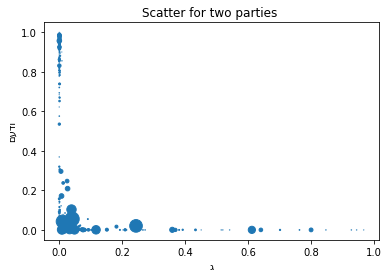

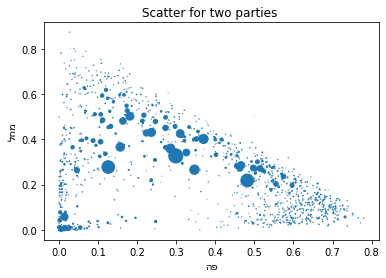

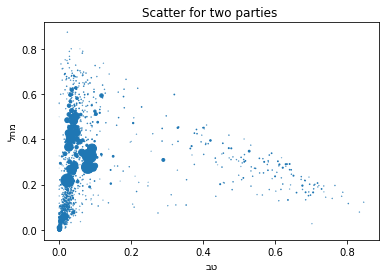

In [19]:

#print(df_2020)
two_parties_scatter(df_2020, "ג", "ודעם")
two_parties_scatter(df_2020, "פה", "מחל")
two_parties_scatter(df_2020, "טב", "מחל")


ניתן להסיק מהגרף את קשר ההצבעה ל-2 מפלגות לפי אופי האוכלוסייה בעיר. לדוגמא - עבור 2 מפלגות חרדתיות ניתן לראות התאמה גבוהה. קרי - ניתן לראות כי ערים חרדיות הצביעו באופן מוחלט כמעט עבור 2 המפלגות הללו. בנוסף, בדוגמא של מח"ל ופה ניתן לראות את הפיזור ההצבעות, שאחיד באופן יחסי. לסיום, ניתן לראות בגרף של מח"ל ושל טב (ימינה) כי בישובים קטנים וככל הנראה הומוגנים יש נטייה להצביע ברוב מוחץ למפלגה מסויימת, לחילופין ההצבעה בערים גדולות פחות אופיינית ל-טב באופן יחסי לגודלה, זאת לעומת הליכוד. כמו כן ניתן לראות את פיזור הערים הגדולות למול הישובים הקטנים, וכיצד ההצבעות בהן באות לידי ביטוי בסך מניין הקולות של צמד המפלגות.
לכן :
בגרף הראשון ניתן לראות את הדמיון בין אופי הישוב להצבעה למלגה
בגרף השני ניתן לראות כיצד מפלגה שמתמודדת להנהגה גדולה מקבלת קולות מפיזור גדול של האוכ' במדינה
ובגרף השלישי ניתן לראות כיצד מפלגות בעלות גודל שונה מושפעות מן הצבעות שונות, חרף האידאולוגיה הדומה שלהן.

בנוגע לתוצאות מפת החום:
קילבנו מטרציה בגודל 8 על 8 (כמספר המלגות הגודלות ביותר שעברו את אחוז החסימה, כך שניתן לראות את קורלציית ההצבעה בין כל זוג של מפלגות.
קרי - האם יש קשר מובהק בין הצבעה ל-2 מפלגות שונות, או שאין קשר כלל.
לדוגמא - המפלגות "העבודה" ו-"כחול לבן" בעלת קורלציה גבוהה מכיוון שההצבעה הינה "דומה" פוליטית , הדמיון באופי האוכ' בעיר מעיד על כך שהמפלגות תהיינה בעלות אחוזי הצבעה גבוהים בעיר הזו

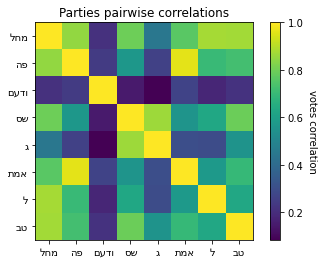

In [21]:
df_2020_raw = pd.read_csv('/content/votes per city 2020.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[5:]] # removing "metadata" columns

def heatmap_corr(corr_mat, names):
    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()
    im = ax.imshow(corr_mat, cmap=plt.get_cmap('viridis'))
    n = corr_mat.shape[0]  # get number of variables 
    ax.set_xticks(np.arange(n))
    ax.set_yticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.set_yticklabels(rev_names)
    ax.set_title("Parties pairwise correlations")
    
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax) #  **cbar_kw)
    cbar.ax.set_ylabel('votes correlation', rotation=-90, va="bottom")

    
# need to extract only top 8 parties 
parties_corr=df_2020[parties_votes_percents(df_2020,0.0325).index].corr()
heatmap_corr(parties_corr, list(parties_corr.columns))
df_orderd=df_2020[["טב","ל","מחל","שס","ג","פה","אמת","ודעם"][::-1]]

parties_corr_ordered=df_orderd.corr()


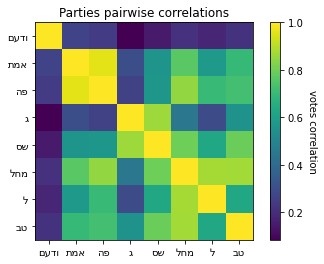

In [22]:
heatmap_corr(parties_corr_ordered,list(parties_corr_ordered.columns))
#print(parties_corr_ordered.columns)

In [24]:
df_2020_raw = pd.read_csv('/content/votes per city 2020.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')

df_2020_raw = df_2020_raw.drop('מעטפות חיצוניות', axis=0)
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[5:]]
df_2020.drop("זץ", axis=1)


# Q3 - (vote_for_party * kosher_voters) / total_votes
#print(df_2020.sum())  # number of votes for each party
scale_up = (df_2020_raw["בזב"]/df_2020_raw["כשרים"])

ones_vector = np.ones((30,1))   # create array of [30,1]
new_scale = scale_up.values.reshape((1,1213))  # we get matrix of 30 x 1213
mult = ones_vector @ new_scale  # matrix mult
new = mult.T * df_2020  # by value
#print(new["פה"].sum())  # how it's impace on some party




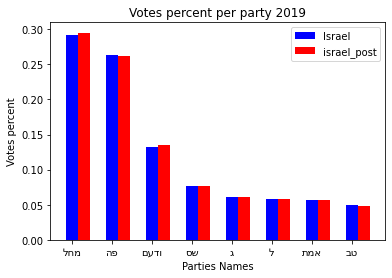

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd4ffa8ef0>)

In [25]:
import matplotlib.pyplot as plt


dist = new.sum(axis=0)
dist_vector = dist / dist.sum()  # dist vector
israel = df_2020.sum()
dist_israel = israel / israel.sum() # dist vector of israel

# Bar plot for a party, only showing values above a certain threshold
def party_bar(df1, df2, thresh):
    width = 0.3  # set column width 
    votes_1 = parties_votes_percents(df1, thresh)  # total votes for each party
    votes_2 = parties_votes_percents(df2, thresh)  # total votes for each party

    n = len(votes_1)  # number of parties
    names = votes_1.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    all_bar = ax.bar(np.arange(n), list(votes_1), width, color='b')
    city_bar = ax.bar(np.arange(n)+width, list(votes_2), width, color='r')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2019')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((all_bar[0], city_bar[0]), ('Israel', "israel_post"))
    plt.show()

    return fig, ax

party_bar(df_2020,new,0.0325)    



In [26]:
df_2020_raw = pd.read_csv('/content/vote_per_kalpi_2020.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')

df_2020_raw = df_2020_raw.drop('מעטפות חיצוניות', axis=0)
df_2020 = df_2020_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
df_2020 = df_2020[df_2020.columns[9:]]
df_2020.drop("זץ", axis=1)

#print(df_2020)

# Q3b - (vote_for_party * kosher_voters) / total_votes
#print(df_2020.sum())  # number of votes for each party
scale_up = (df_2020_raw["בזב"]/df_2020_raw["כשרים"])

ones_vector = np.ones((30,1))   # create array of [30,1]
new_scale = scale_up.values.reshape((1,10631))  # we get matrix of 29 x 1213
mult = ones_vector @ new_scale  # matrix mult
new = mult.T * df_2020  # by value
#print(new["פה"].sum())  # how it's impace on some party



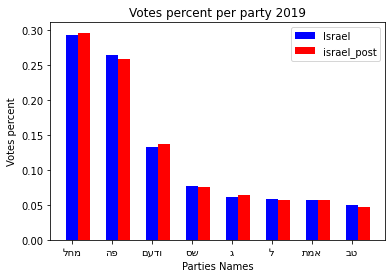

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdd50012550>)

In [27]:
# Bar plot for a party, only showing values above a certain threshold
def party_bar(df1, df2, thresh):
    width = 0.3  # set column width 
    votes_1 = parties_votes_percents(df1, thresh)  # total votes for each party
    votes_2 = parties_votes_percents(df2, thresh)  # total votes for each party

    n = len(votes_1)  # number of parties
    names = votes_1.keys()

    rev_names = [name[::-1] for name in list(names)]
    fig, ax = plt.subplots()  # plt.subplots()

    all_bar = ax.bar(np.arange(n), list(votes_1), width, color='b')
    city_bar = ax.bar(np.arange(n)+width, list(votes_2), width, color='r')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Votes percent per party 2019')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((all_bar[0], city_bar[0]), ('Israel', "israel_post"))
    plt.show()

    return fig, ax

party_bar(df_2020,new,0.0325)    


התוצאות אכן השתנו קלות, אך עם כמות הצבעות גדולה יחסית יש לכך משמעות חשובה ביכולת להוספת חברי כנסת ולבניית קואליציה.